# __Assignment 2__
## __Mario Gonzalez__
### 1/22/2024

# __Imports__

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import inv



# __Problem 1: GD and Regression__


## __Part 1__

In [2]:
# Data
x = np.array([1,2,1.5, 3])
y = np.array([1,1,0,2])

print(x,y)

[1.  2.  1.5 3. ] [1 1 0 2]


In [3]:
# Making the regression and gradient descent algorithm

# Hyperparameters
learning_rate = 0.0001
epochs = 5000

# Initialize parameters
a = 0
b = 0
c = 0

# Gradient Descent
for epoch in range(epochs):
    predictions = a * x**2 + b * x + c
    errors = predictions - y
    a -= learning_rate * (1/len(x)) * np.sum(errors * x**2)
    b -= learning_rate * (1/len(x)) * np.sum(errors * x)
    c -= learning_rate * (1/len(x)) * np.sum(errors)

# Print the final parameters
print("Final Parameters:")
print("a:", a)
print("b:", b)
print("c:", c)

Final Parameters:
a: 0.18433639627513013
b: 0.07934394030366461
c: 0.0565345551433832


## __Part 2 Plotting and Visualizing__ 

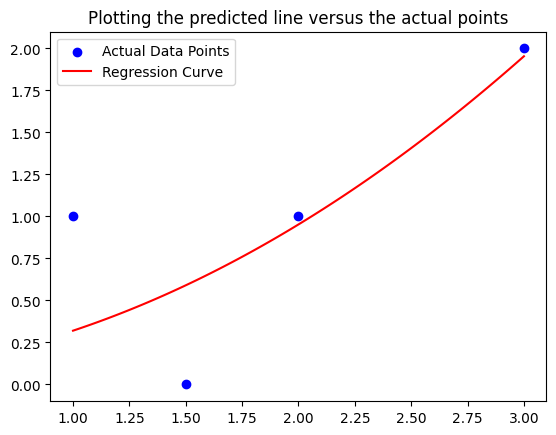

In [4]:
# Lines
x_values = np.linspace(min(x), max(x), 100)
y_values = a * x_values**2 + b * x_values + c

# Plotting the predicted line versus the actual points
plt.scatter(x,y,color='blue',label="Actual Data Points")
plt.plot(x_values, y_values, color='red', label='Regression Curve')
plt.title("Plotting the predicted line versus the actual points")
plt.legend()
plt.show()

### Short Analysis

The prediction that I receive for x=2.5 seems to be accurate or a good prediction because at x=2, y=1 and at x=3,y=2. So, my idea was that if I give it a value somewhere between 2 and 3, then a good prediction would indicate a number greater than 1 and less than 3. Our values for theta help with that as well since theta_one is larger than theta_0. Lets move on to Part 2. The regression line also seems to be parabolic which is perfect.

# __Problem 2: Happiness Analysis__

In [5]:
# Importing and Reading the Data
happiness_data = pd.read_csv('happiness.csv', header=None)
time_with_loved_ones_data = pd.read_csv('time_with_loved_ones.csv', header=None)

print(f"happiness data: \n {happiness_data.head(10)}\n")
print(f"time data: \n {time_with_loved_ones_data.head(10)}")

x = time_with_loved_ones_data[0]
y = happiness_data[0]

happiness data: 
        0
0  4.650
1  6.029
2  5.862
3  4.573
4  3.490
5  5.476
6  3.433
7  7.511
8  7.863
9  2.651

time data: 
         0
0  10.976
1  14.304
2  12.055
3  10.898
4   8.473
5  12.918
6   8.752
7  17.835
8  19.273
9   7.669


In [6]:
# Finding the best a and b values
learning_rate = 0.01

learning_rate = 0.01
epochs = 1000

# Initialize parameters
a = 0
b = 0

# Gradient Descent
for epoch in range(epochs):
    predictions = a * x + b
    errors = predictions - y
    a -= learning_rate * (1/len(x)) * np.sum(errors * x)
    b -= learning_rate * (1/len(x)) * np.sum(errors)

# Print the final parameters
print("Final Parameters:")
print("a:", a)
print("b:", b)

Final Parameters:
a: 0.3998234069652679
b: 0.30739860280398845


## __Part 2: Plotting and Visualizing Happiness Data__


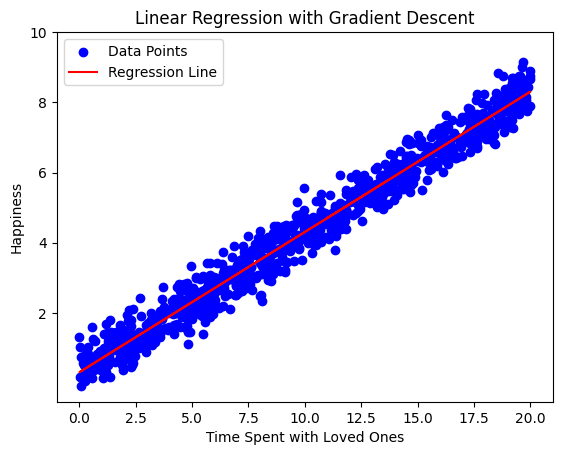

In [7]:
# Plotting
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, a * x + b, color='red', label='Regression Line')
plt.xlabel('Time Spent with Loved Ones')
plt.ylabel('Happiness')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.yticks([2, 4, 6, 8, 10])
plt.show()

## __Part 3: Happiness Prediction__

To predict how happy a person is with 15 hours spent with loved ones we can simply plug in 15 to our equation as shown below.

In [8]:
# Happiness Prediction
# feel free to play around with this value
hours = 15
def f(hours):
    return a * hours + b
print(f"A person that spends {hours} hours with their loved \n ones has a predicted happiness rating of \n{f(hours)}.")

A person that spends 15 hours with their loved 
 ones has a predicted happiness rating of 
6.3047497072830065.


# __Problem 3: Stock Market Analysis__

## __Part 1: Preprocessing__

The preprocesssing I did on the data was in the Poynomial Regression and GD step.

I used a scaler to scale the X_train data and obviosuly the X_test data as well when getting the predictions. I used the following line 

```poly = PolynomialFeatures(degree=2, include_bias=False) ```

for the polynomial regression and then used poly to transform the data.



## __Part 2: Linear Regression, Gradient Descent, and Closed Form__ 

In [9]:
# Importing and Reading the Data

data = pd.read_csv('easier_data.csv', header=None)
label = pd.read_csv('label.csv', header=None)

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)


In [10]:
# Solving With Linear Regression
model_sklearn = LinearRegression()

# Fit the model on the training data
model_sklearn.fit(X_train, y_train)

# Predict on the test set
predictions_sklearn = model_sklearn.predict(X_test).flatten()

# Print the coefficients
print("Sklearn Linear Regression Coefficients: ", "\n")
print("Intercept:", model_sklearn.intercept_ , "\n")
print("Coefficients:", "\n", model_sklearn.coef_ , "\n")

# Print the total error (Mean Squared Error)
mse_sklearn = mean_squared_error(y_test, predictions_sklearn)
print("Sklearn Linear Regression Mean Squared Error:", mse_sklearn)

y_test_values = y_test.iloc[:, 0].values
combined_df = pd.DataFrame({'Predictions': predictions_sklearn, 'True Labels': y_test_values})
print(f"\n{combined_df.head(20)}")

Sklearn Linear Regression Coefficients:  

Intercept: [-28.15912027] 

Coefficients: 
 [[-7.97139207e-03  1.38011741e+00 -5.15804354e-04  1.38400464e-04
   3.34998796e-01  1.01607602e+00  1.38347204e+00  1.01358181e+00
   3.34650695e-01  3.46830327e-01]] 

Sklearn Linear Regression Mean Squared Error: 0.05461759461197483

    Predictions  True Labels
0     11.851319        11.59
1     10.296040        10.31
2      8.258368         8.32
3      3.485064         3.08
4     -4.351526        -4.37
5      2.511732         2.82
6     -8.095958        -7.92
7     -5.415108        -5.24
8     -3.004647        -2.75
9    -12.409089       -12.60
10     7.440447         7.30
11    11.278985        10.87
12    -5.124867        -4.87
13     8.954749         8.79
14    11.911518        12.00
15    -6.794455        -6.44
16    -2.310906        -2.47
17    -0.852647        -0.84
18    -2.593208        -2.68
19    -7.234314        -7.08


In [11]:
# Solving with own Gradient Descent

# This is because I was getting a inf value for my MSE, this seems to have fixed it.
# Also lowering learning rate. It seemed to be a convergance issue.

# I assume this is the Preprocessing that was needed.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Hyperparameters
learning_rate = 0.001  
epochs = 5000  

# Initialize parameters
a = np.zeros(X_train.shape[1])
b = 0

# Gradient Descent
for epoch in range(epochs):
    # Dot Product of features and coeff + b
    predictions = np.dot(X_train_scaled, a) + b
    errors = predictions - y_train.values.flatten()
    
    # Update parameters
    a -= learning_rate * (1/len(X_train_scaled)) * np.dot(errors, X_train_scaled)
    b -= learning_rate * (1/len(X_train_scaled)) * np.sum(errors)

# Print the final parameters
print("Final Parameters:")
print("a:", a)
print("b:", b)

# Calculate predictions on the test set
predictions_gradient_descent = np.dot(X_test_scaled, a) + b

# Print the total error (Mean Squared Error)
mse_gradient_descent = mean_squared_error(y_test_values, predictions_gradient_descent)
print("Gradient Descent Mean Squared Error:", mse_gradient_descent)

results_gradient_descent = pd.DataFrame({'True Labels': y_test.values.flatten(), 'Predictions': predictions_gradient_descent})
print("\nGradient Descent Predictions vs True Labels:")
print(results_gradient_descent.head(20))

Final Parameters:
a: [ 1.00758751e-02  4.01926907e+00 -3.85206627e-02 -1.91479316e-04
  1.00485025e+00  3.00527636e+00  4.00591338e+00  2.86470771e+00
  9.46160528e-01  1.00229591e+00]
b: 0.7515810252837021
Gradient Descent Mean Squared Error: 0.06632566021373507

Gradient Descent Predictions vs True Labels:
    True Labels  Predictions
0         11.59    11.835645
1         10.31    10.117712
2          8.32     8.154330
3          3.08     3.434273
4         -4.37    -4.350960
5          2.82     2.414724
6         -7.92    -8.055820
7         -5.24    -5.285298
8         -2.75    -3.074604
9        -12.60   -12.227871
10         7.30     7.248626
11        10.87    11.123690
12        -4.87    -5.099514
13         8.79     8.918287
14        12.00    11.722679
15        -6.44    -6.733222
16        -2.47    -2.312279
17        -0.84    -0.790733
18        -2.68    -2.446539
19        -7.08    -7.118047


In [12]:
# Closed-form solution 

# Closed-form solution using numpy
X_train_closed_form = np.column_stack((np.ones(len(X_train)), X_train))


# Calculate coefficients using the normal equation
theta_closed_form = np.linalg.inv(X_train_closed_form.T.dot(X_train_closed_form)).dot(X_train_closed_form.T).dot(y_train)

# Extract coefficients
c_closed_form = theta_closed_form[0]
coefficients_closed_form = theta_closed_form[1:]

# Print the coefficients
print("Intercept:", c_closed_form)
print("Coefficients:", "\n", coefficients_closed_form , "\n")

# Calculate predictions on the test set
X_test_closed_form = np.column_stack((np.ones(len(X_test)), X_test))
predictions_closed_form = X_test_closed_form.dot(theta_closed_form)

# Print the total error (Mean Squared Error)
mse_closed_form = mean_squared_error(y_test, predictions_closed_form)
print("Closed-form Solution Mean Squared Error:", mse_closed_form)

# Print predictions next to true labels
results_closed_form = pd.DataFrame({'True Labels': y_test.values.flatten(), 'Predictions': predictions_closed_form.flatten()})
print("\nClosed-form Solution Predictions vs True Labels:")
print(results_closed_form.head(20))

Intercept: [-28.15912027]
Coefficients: 
 [[-7.97139207e-03]
 [ 1.38011741e+00]
 [-5.15804354e-04]
 [ 1.38400464e-04]
 [ 3.34998796e-01]
 [ 1.01607602e+00]
 [ 1.38347204e+00]
 [ 1.01358181e+00]
 [ 3.34650695e-01]
 [ 3.46830327e-01]] 

Closed-form Solution Mean Squared Error: 0.05461759461197269

Closed-form Solution Predictions vs True Labels:
    True Labels  Predictions
0         11.59    11.851319
1         10.31    10.296040
2          8.32     8.258368
3          3.08     3.485064
4         -4.37    -4.351526
5          2.82     2.511732
6         -7.92    -8.095958
7         -5.24    -5.415108
8         -2.75    -3.004647
9        -12.60   -12.409089
10         7.30     7.440447
11        10.87    11.278985
12        -4.87    -5.124867
13         8.79     8.954749
14        12.00    11.911518
15        -6.44    -6.794455
16        -2.47    -2.310906
17        -0.84    -0.852647
18        -2.68    -2.593208
19        -7.08    -7.234314


## __Part 3: Repeating using Polynomial Regression__

In [13]:
#Polynomial regression: 2nd Order

# Generate polynomial features for both training and test sets
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Closed-form solution using numpy for Polynomial Regression
X_train_poly_closed_form = np.column_stack((np.ones(len(X_train_poly)), X_train_poly))
theta_poly_closed_form = np.linalg.inv(X_train_poly_closed_form.T.dot(X_train_poly_closed_form)).dot(X_train_poly_closed_form.T).dot(y_train)

# Extract coefficients for Polynomial Regression
c_poly_closed_form = theta_poly_closed_form[0]
coefficients_poly_closed_form = theta_poly_closed_form[1:]

# Print the coefficients for Polynomial Regression
print("Polynomial Regression Coefficients:")
print("Intercept:", c_poly_closed_form)
print("Coefficients:", coefficients_poly_closed_form.flatten())

# Calculate predictions on the test set for Polynomial Regression
X_test_poly_closed_form = np.column_stack((np.ones(len(X_test_poly)), X_test_poly))
predictions_poly_closed_form = X_test_poly_closed_form.dot(theta_poly_closed_form)

# Print the total error (Mean Squared Error) for Polynomial Regression
mse_poly_closed_form = mean_squared_error(y_test, predictions_poly_closed_form)
print("Polynomial Regression Mean Squared Error:", mse_poly_closed_form)

# Print predictions next to true labels for Polynomial Regression
results_poly_closed_form = pd.DataFrame({'True Labels': y_test.values.flatten(), 'Predictions': predictions_poly_closed_form.flatten()})
print("\nPolynomial Regression Predictions vs True Labels:")
print(results_poly_closed_form.head(20))

Polynomial Regression Coefficients:
Intercept: [-28.18104332]
Coefficients: [ 7.53099030e-03  1.36771392e+00  2.61066829e-02 -2.43684464e-02
  3.45031379e-01  9.72142959e-01  1.38907434e+00  1.00371564e+00
  2.69254539e-01  4.25810262e-01 -2.33914186e-03  6.05719486e-04
  7.75769473e-04 -7.36472942e-04  2.22359977e-03  5.08495513e-04
 -4.82598163e-04  9.14800983e-06  1.11211920e-03 -1.72161100e-03
 -5.58379635e-04 -4.33137502e-04  2.27266780e-03  1.12644691e-03
 -6.03389872e-04  6.00307526e-04  1.81548631e-05  2.24317048e-03
 -2.62996775e-03 -9.43783658e-04 -1.91580269e-03 -1.57189229e-03
 -1.60103413e-03  4.20462838e-04  2.66834159e-03  6.23262268e-04
 -2.92062387e-03  5.01561647e-03 -7.14843415e-04  3.24188274e-04
  4.56975582e-04 -3.01891847e-03  2.32085263e-03 -4.10243104e-03
 -2.26483939e-03  4.92053847e-03 -1.84956086e-03 -3.14729776e-03
  2.30695920e-04  1.43540569e-03  3.45343804e-03 -1.70161775e-04
 -1.80230367e-03 -3.35052891e-04  4.89755839e-04 -4.56104425e-05
 -4.39961147e-

# __Problem 4: Closed Form Solution__

## __Part 1: In Code__

In [14]:
# Initializing the data
x = np.array([0,1,2,3])
y = np.array([1,0,2,-2])

# The Design Matrix
X = np.column_stack((np.ones_like(x), x))

# Calculate coefficients
theta_closed_form = inv(np.dot(X.T, X)).dot(X.T).dot(y)

# Extract coefficients
b, a = theta_closed_form

print("Closed-Form Solution Coefficients:")
print("Intercept (b):", b)
print("Slope (a):", a)

Closed-Form Solution Coefficients:
Intercept (b): 1.3000000000000003
Slope (a): -0.7000000000000002


## __Part 2: By Hand__

Given data:

$$\begin{align*}
x = [0, 1, 2, 3] 
\end{align*}$$

$$\begin{align*}
y = [1, 0, 2, -2] 
\end{align*}$$

Assuming the linear function is  f(x) = ax + b , the normal equation for the closed-form solution is:

$$\begin{align*} X^T X \theta = X^T y  \end{align*}$$ 

Where:

 X = $$\begin{bmatrix} 1 & 0 \\ 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}$$ 

theta = $$\begin{bmatrix} b \\ a \end{bmatrix}$$ 

y = [1, 0, 2, -2] 

Substituting the values:

 $$\begin{bmatrix} 4 & 6 \\ 6 & 14 \end{bmatrix} \begin{bmatrix} b \\ a \end{bmatrix} = [1, 0, 2, -2]^T $$

Solving the system:

$$ \begin{align*} 4b + 6a &= 1 \\ 6b + 14a &= 0 \end{align*}$$

Solving for  b  and  a :

$$ \begin{align*} b &= 1 \\ a &= -1 \end{align*} $$

Therefore, the best-fitting linear function is 

$$ \begin{align*} f(x) = -x + 1  \end{align*} $$


# __Problem 5: Feature Maps__

__Given data:__

$$
\begin{align*}
x_1 & : [0, 2, -2, 3, 4] 
\end{align*}
$$
$$
\begin{align*}
x_2 & : [2, -1, 1, 3, 1]
\end{align*}
$$

__Feature maps:__

$$
\begin{align*}
\phi_1(x) & : x_1 \\
\phi_2(x) & : x_2 \\
\phi_3(x) & : x_1 \cdot (x_2)^2 \\
\phi_4(x) & : (x_1)^3 \\
\phi_5(x) & : (x_2)^2 \\
\phi_6(x) & : 1
\end{align*}
$$

__Transformed data:__

$$
\begin{align*}
\phi_1(x) & : [0, 2, -2, 3, 4] \\
\phi_2(x) & : [2, -1, 1, 3, 1] \\
\phi_3(x) & : [0, -2, -2, 27, 64] \\
\phi_4(x) & : [0, 8, -8, 27, 64] \\
\phi_5(x) & : [4, 1, 1, 9, 1] \\
\phi_6(x) & : [1, 1, 1, 1, 1]
\end{align*}
$$

__So, the transformed data using the given feature maps is:__

$$
\begin{bmatrix}
0 & 2 & -2 & 3 & 4 \\
2 & -1 & 1 & 3 & 1 \\
0 & -2 & -2 & 27 & 64 \\
0 & 8 & -8 & 27 & 64 \\
4 & 1 & 1 & 9 & 1 \\
1 & 1 & 1 & 1 & 1
\end{bmatrix}
$$

If it does not render on GradeScope, please see the attached image labeled. Q5.png